In [1]:
# Analytics and modeling
import pymc as pm
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_predict
from sklearn import linear_model
from sklearn.model_selection import cross_val_score
from scipy import special, stats
import statsmodels.api as sm


# Graphics and visualization
import matplotlib.pyplot as plt
import seaborn as sns
import arviz as az
az.style.use('arviz-darkgrid')
color = '#87ceeb'

# Random seed
random_seed = 730612

In [2]:
df = pd.read_csv('cirrhosis.csv')

In [3]:
df.describe(include = 'all')

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
count,418.000000,418.000000,418,312,418.000000,418,312,312,312,418,418.000000,284.000000,418.000000,310.000000,312.000000,312.000000,282.000000,407.000000,416.000000,412.000000
unique,NaN,NaN,3,2,NaN,2,2,2,2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,C,D-penicillamine,NaN,F,N,Y,N,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,232,158,NaN,374,288,160,222,354,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,209.500000,1917.782297,NaN,NaN,18533.351675,NaN,NaN,NaN,NaN,NaN,3.220813,369.510563,3.497440,97.648387,1982.655769,122.556346,124.702128,257.024570,10.731731,3.024272
std,120.810458,1104.672992,NaN,NaN,3815.845055,NaN,NaN,NaN,NaN,NaN,4.407506,231.944545,0.424972,85.613920,2140.388824,56.699525,65.148639,98.325585,1.022000,0.882042
min,1.000000,41.000000,NaN,NaN,9598.000000,NaN,NaN,NaN,NaN,NaN,0.300000,120.000000,1.960000,4.000000,289.000000,26.350000,33.000000,62.000000,9.000000,1.000000
25%,105.250000,1092.750000,NaN,NaN,15644.500000,NaN,NaN,NaN,NaN,NaN,0.800000,249.500000,3.242500,41.250000,871.500000,80.600000,84.250000,188.500000,10.000000,2.000000
50%,209.500000,1730.000000,NaN,NaN,18628.000000,NaN,NaN,NaN,NaN,NaN,1.400000,309.500000,3.530000,73.000000,1259.000000,114.700000,108.000000,251.000000,10.600000,3.000000
75%,313.750000,2613.500000,NaN,NaN,21272.500000,NaN,NaN,NaN,NaN,NaN,3.400000,400.000000,3.770000,123.000000,1980.000000,151.900000,151.000000,318.000000,11.100000,4.000000


Variables like Bilirubin show a large difference between the mean value and the max value, therefore there might be a need for scaling the variables here. 

In [4]:
df.head()

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0


In [5]:
df = df.drop('ID', axis = 1)
numerical_vars = ['N_Days', 'Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin']
col_names = df.columns


['Status',
 'Drug',
 'Sex',
 'Ascites',
 'Hepatomegaly',
 'Spiders',
 'Edema',
 'Stage']

In [6]:
numerical_vars

['N_Days',
 'Age',
 'Bilirubin',
 'Cholesterol',
 'Albumin',
 'Copper',
 'Alk_Phos',
 'SGOT',
 'Tryglicerides',
 'Platelets',
 'Prothrombin']

## Data Exploration

/Users/sunidhigoyal/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Users/sunidhigoyal/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


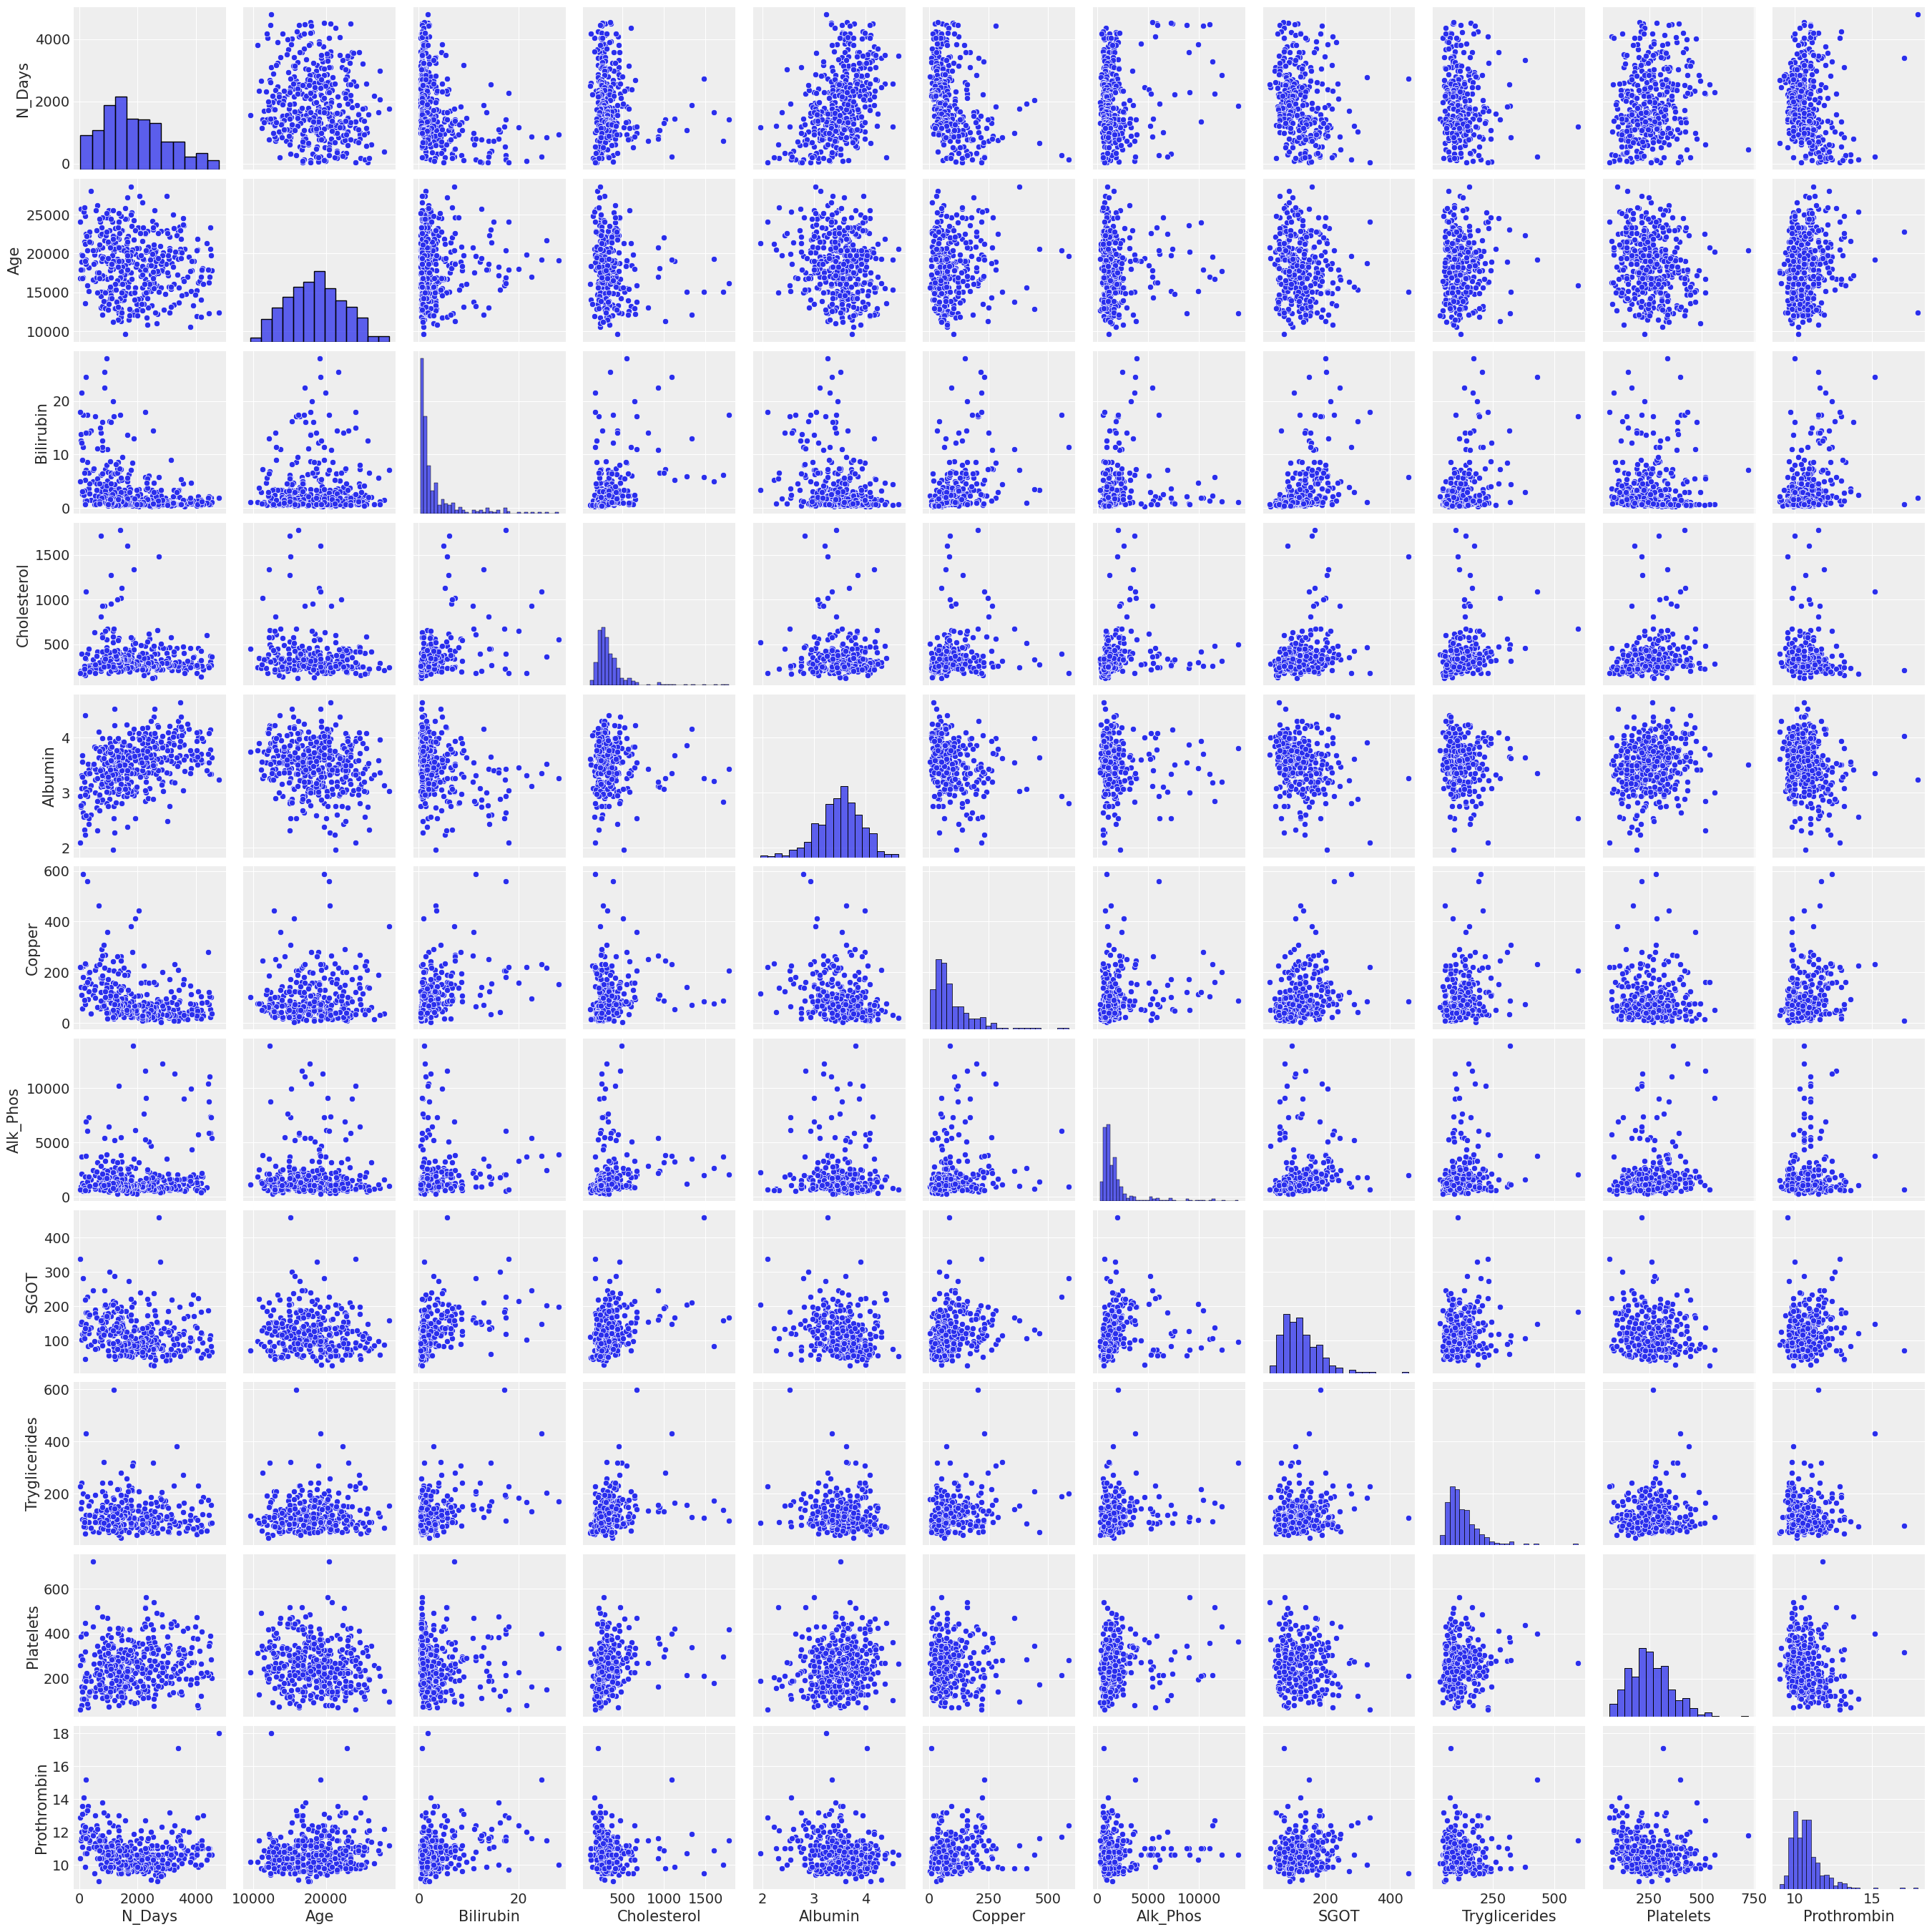

In [7]:
sns.pairplot(df, vars = numerical_vars)

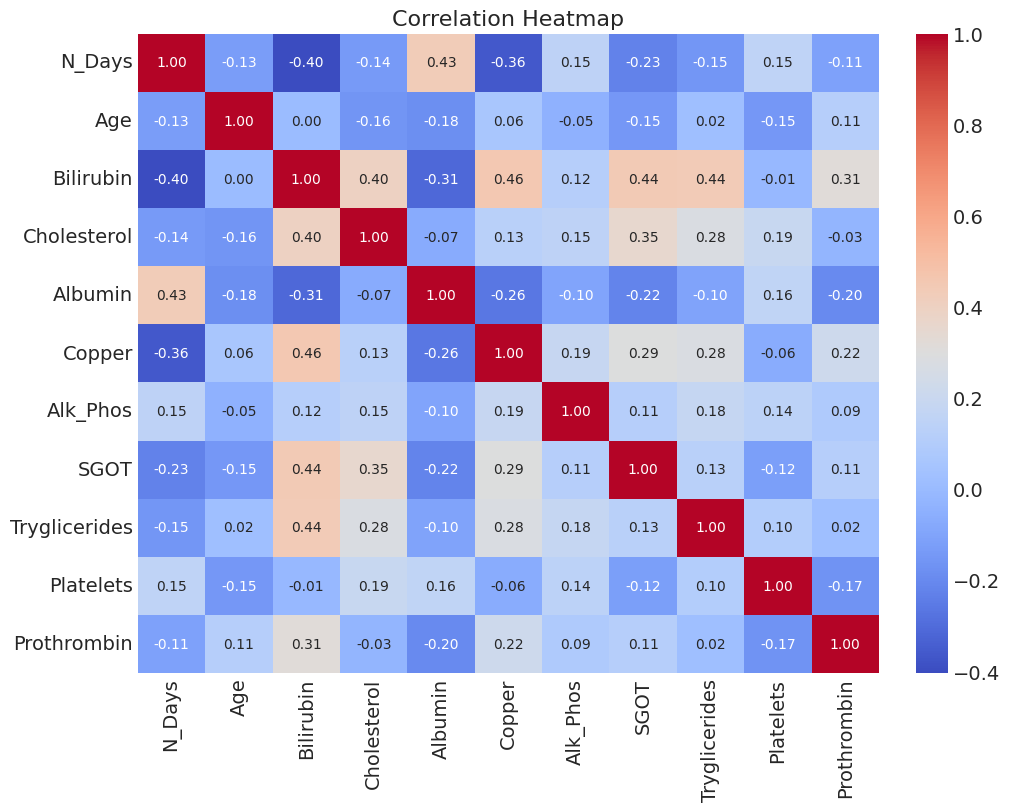

In [10]:
correlation_matrix = df.loc[:,numerical_vars].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [11]:
df = pd.get_dummies(df, drop_first = False, dtype = float)
df.describe(include = 'all')

,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,...,Sex_M,Ascites_N,Ascites_Y,Hepatomegaly_N,Hepatomegaly_Y,Spiders_N,Spiders_Y,Edema_N,Edema_S,Edema_Y
count,418.000000,418.000000,418.000000,284.000000,418.000000,310.000000,312.000000,312.000000,282.000000,407.000000,...,418.000000,418.000000,418.000000,418.000000,418.000000,418.00000,418.000000,418.000000,418.000000,418.000000
mean,1917.782297,18533.351675,3.220813,369.510563,3.497440,97.648387,1982.655769,122.556346,124.702128,257.024570,...,0.105263,0.688995,0.057416,0.363636,0.382775,0.53110,0.215311,0.846890,0.105263,0.047847
std,1104.672992,3815.845055,4.407506,231.944545,0.424972,85.613920,2140.388824,56.699525,65.148639,98.325585,...,0.307260,0.463459,0.232915,0.481622,0.486647,0.49963,0.411530,0.360525,0.307260,0.213698
min,41.000000,9598.000000,0.300000,120.000000,1.960000,4.000000,289.000000,26.350000,33.000000,62.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,1092.750000,15644.500000,0.800000,249.500000,3.242500,41.250000,871.500000,80.600000,84.250000,188.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,0.000000
50%,1730.000000,18628.000000,1.400000,309.500000,3.530000,73.000000,1259.000000,114.700000,108.000000,251.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,1.00000,0.000000,1.000000,0.000000,0.000000
75%,2613.500000,21272.500000,3.400000,400.000000,3.770000,123.000000,1980.000000,151.900000,151.000000,318.000000,...,0.000000,1.000000,0.000000,1.000000,1.000000,1.00000,0.000000,1.000000,0.000000,0.000000
max,4795.000000,28650.000000,28.000000,1775.000000,4.640000,588.000000,13862.400000,457.250000,598.000000,721.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000


In [12]:
pd.isnull(df).any()

N_Days                  False
Age                     False
Bilirubin               False
Cholesterol              True
Albumin                 False
Copper                   True
Alk_Phos                 True
SGOT                     True
Tryglicerides            True
Platelets                True
Prothrombin              True
Stage                    True
Status_C                False
Status_CL               False
Status_D                False
Drug_D-penicillamine    False
Drug_Placebo            False
Sex_F                   False
Sex_M                   False
Ascites_N               False
Ascites_Y               False
Hepatomegaly_N          False
Hepatomegaly_Y          False
Spiders_N               False
Spiders_Y               False
Edema_N                 False
Edema_S                 False
Edema_Y                 False
dtype: bool

In [13]:
from sklearn.base import TransformerMixin

class DataFrameImputer(TransformerMixin):

    def __init__(self):
        """Impute missing values.

        Columns of dtype object are imputed with the most frequent value 
        in column.
        
        Columns of dtype floating point are imputed with the mean.

        Columns of other types are imputed with median of the column.

        """
    def fit(self, X, y=None):

        self.fill = pd.Series([X[c].value_counts().index[0]
            if X[c].dtype == np.dtype('O') 
                               else X[c].mean() if X[c].dtype == np.dtype('f')
                                else X[c].median() for c in X],
            index=X.columns)

        return self

    def transform(self, X, y=None):
        return X.fillna(self.fill)

In [14]:
clean_df = DataFrameImputer().fit_transform(df)
clean_df.isnull().sum()

N_Days                  0
Age                     0
Bilirubin               0
Cholesterol             0
Albumin                 0
Copper                  0
Alk_Phos                0
SGOT                    0
Tryglicerides           0
Platelets               0
Prothrombin             0
Stage                   0
Status_C                0
Status_CL               0
Status_D                0
Drug_D-penicillamine    0
Drug_Placebo            0
Sex_F                   0
Sex_M                   0
Ascites_N               0
Ascites_Y               0
Hepatomegaly_N          0
Hepatomegaly_Y          0
Spiders_N               0
Spiders_Y               0
Edema_N                 0
Edema_S                 0
Edema_Y                 0
dtype: int64

In [15]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(clean_df[numerical_vars])
stats.describe(X_scaled)

DescribeResult(nobs=418, minmax=(array([-1.70098418, -2.34445031, -0.6634848 , -1.19378636, -3.62208326,
       -1.17317486, -0.80632334, -1.92170287, -1.59796883, -2.0108201 ,
       -1.69987906]), array([2.60770885, 2.65439796, 5.62877916, 7.38611125, 2.6917774 ,
       6.67667467, 6.44102667, 6.86744925, 8.86770778, 4.7893926 ,
       7.13780062])), mean=array([ 1.01991780e-16,  1.10491095e-16, -8.49931502e-18,  1.14740753e-16,
        1.34289177e-15,  8.49931502e-17,  5.09958901e-17, -3.61220888e-16,
        1.18990410e-16,  3.39972601e-17, -1.86984930e-16]), variance=array([1.00239808, 1.00239808, 1.00239808, 1.00239808, 1.00239808,
       1.00239808, 1.00239808, 1.00239808, 1.00239808, 1.00239808,
       1.00239808]), skewness=array([ 0.47090442,  0.08653818,  2.70784878,  4.27447472, -0.46584711,
        2.8265212 ,  3.58261663,  1.77810915,  3.25399288,  0.63797855,
        2.22215125]), kurtosis=array([-0.49071071, -0.62369745,  7.95486314, 22.71832087,  0.54566815,
       11.

In [17]:
clean_df.columns

Index(['N_Days', 'Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper',
       'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin',
       'Stage', 'Status_C', 'Status_CL', 'Status_D', 'Drug_D-penicillamine',
       'Drug_Placebo', 'Sex_F', 'Sex_M', 'Ascites_N', 'Ascites_Y',
       'Hepatomegaly_N', 'Hepatomegaly_Y', 'Spiders_N', 'Spiders_Y', 'Edema_N',
       'Edema_S', 'Edema_Y'],
      dtype='object')

In [19]:
categorical_vars = [x for x in clean_df.columns if x not in numerical_vars]
categorical_vars

['Stage',
 'Status_C',
 'Status_CL',
 'Status_D',
 'Drug_D-penicillamine',
 'Drug_Placebo',
 'Sex_F',
 'Sex_M',
 'Ascites_N',
 'Ascites_Y',
 'Hepatomegaly_N',
 'Hepatomegaly_Y',
 'Spiders_N',
 'Spiders_Y',
 'Edema_N',
 'Edema_S',
 'Edema_Y']

In [20]:
clean_df[categorical_vars].to_numpy()
X_cirr = np.hstack((X_scaled, clean_df[categorical_vars].to_numpy()))

In [21]:
X_cirr.shape

(418, 28)

In [22]:
pd.DataFrame(X_cirr).head()

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,-1.375612,0.768941,2.562152,-0.462810,-2.114296,0.869937,-0.043326,0.354624,0.976773,-0.689990,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1,2.340341,0.546706,-0.481759,-0.250257,1.513818,-0.501099,2.987731,-0.143679,-0.579186,-0.370101,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
2,-0.820938,1.852567,-0.413611,-0.903470,-0.041088,1.595779,-0.685119,-0.498998,-1.190456,-1.092430,...,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.006542,0.383244,-0.322748,-0.550942,-2.255651,-0.366683,2.308028,-1.222487,-0.505093,-0.762223,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,-0.375023,-1.210972,0.040704,-0.369494,0.076708,0.695197,-0.602359,-0.151226,-0.875559,-1.247215,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
